In [8]:
%load_ext autoreload
%autoreload 2

from glob import glob
import matplotlib.pyplot as plt
import pandas as pd
import os
from pathlib import Path
import sys

# Set the root directory to Sorrento Home path
root_path = Path.cwd().parents[0]
sys.path.append(str(root_path))

from scripts.env import SLIDE_N
from scripts.utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Visualize the labeled data

In [11]:
well_api = "z8jfoje1o1"
file_pth = np.random.choice(glob(f"../Processed_{SLIDE_N}/{well_api}/*.parquet"))
train_1 = pd.read_parquet(file_pth)
print(f"The data frequency is {train_1.index.freq}")

The data frequency is None


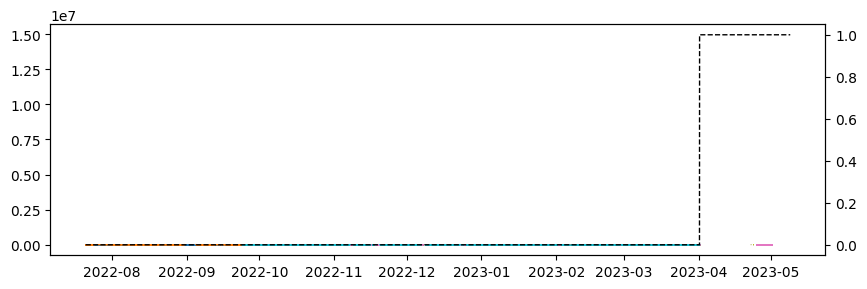

In [12]:
fig,ax = plt.subplots(figsize=(10,3))
lw = 0.5
ax.plot(train_1.index,train_1.pump_intake_pressure,lw=lw)
ax.plot(train_1.index,train_1.motor_frequency,lw=lw)
ax.plot(train_1.index,train_1.motor_temp,lw=lw)
ax.plot(train_1.index,train_1.x_vibration,lw=lw)
ax.plot(train_1.index,train_1.y_vibration,lw=lw)
ax.plot(train_1.index,train_1.motor_amps_phase_b,lw=lw)
ax.plot(train_1.index,train_1.output_amps_phase_b,lw=lw)
ax.plot(train_1.index,train_1.casing_pressure,lw=lw)
ax.plot(train_1.index,train_1.tubing_pressure,lw=lw)
ax.plot(train_1.index,train_1.gas_rate,lw=lw)
ax.plot(train_1.index,train_1.oil_rate,lw=lw)
ax.plot(train_1.index,train_1.water_rate,lw=lw)
ax = ax.twinx()
ax.plot(train_1.index,train_1.Label,c="k",ls="--",lw=lw+0.5)
plt.show()

### Visualize the cropped features and labels

In [45]:
all_cropped = sorted(glob(f"../Cropped_{SLIDE_N}/*.npz"))
random_file = np.random.choice(all_cropped)
daily = np.load(random_file)
feat = daily["features"]
label = daily["label"]
times = daily["time"]

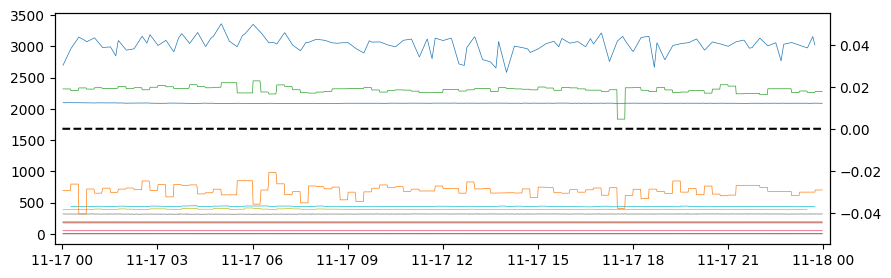

In [46]:
fig,ax = plt.subplots(figsize=(10,3))
lw = 0.5
for col in range(feat.shape[1]):
    ax.plot(times,feat[:,col],lw=lw)
    ax.margins(x=0.01)
ax = ax.twinx()
ax.plot(times, label, c="k", ls="--")
plt.show()